In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras.applications import resnet
from keras.layers import Flatten , Dense , Activation
from keras import optimizers , Sequential
from keras.optimizers import Adam
from keras import models , layers
from keras.layers import Input
from keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path='/content/drive/MyDrive/Dataset/train'
val_path='/content/drive/MyDrive/Dataset/val'
test_data='/content/drive/MyDrive/Dataset/test'

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
val_datagen = ImageDataGenerator(rescale=1./255)
testdata_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=64,shuffle=True,class_mode='sparse')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=64,shuffle=True,class_mode='sparse')
test_generator = testdata_datagen.flow_from_directory(test_data,target_size=(224,224),batch_size=64,shuffle=False,class_mode='sparse')


Found 994 images belonging to 4 classes.
Found 343 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

for layers in vgg16.layers:
          layers.trainable=False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from keras.layers import Input,BatchNormalization , Dropout

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,897,988 (56.83 MB)

 Trainable params: 182,276 (712.02 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 370s 15s/step - accuracy: 0.2978 - loss: 1.4081 - val_accuracy: 0.3120 - val_loss: 1.3553
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 777ms/step - accuracy: 0.5108 - loss: 1.1831 - val_accuracy: 0.3149 - val_loss: 1.3289
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 837ms/step - accuracy: 0.5791 - loss: 1.0282 - val_accuracy: 0.3499 - val_loss: 1.2957
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 858ms/step - accuracy: 0.6008 - loss: 0.9878 - val_accuracy: 0.3819 - val_loss: 1.2762
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 791ms/step - accuracy: 0.6384 - loss: 0.8946 - val_accuracy: 0.4519 - val_loss: 1.2465
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 832ms/step - accuracy: 0.6992 - loss: 0.7973 - val_accuracy: 0.4665 - val_loss: 1.2218
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 960ms/step - accuracy: 0.7343 - loss: 0.7291 - val_accuracy: 0.5219 - val_loss: 1.1855
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 833ms/step - accuracy: 0.7487 - loss: 0.6973 - val_accuracy:

In [ ]:
model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 19s/step - accuracy: 0.9074 - loss: 0.4172


[0.47682124376296997, 0.89673912525177]

In [ ]:
Y_pred = model.predict(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step


In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
y_true = test_generator.classes

In [ ]:
cm = confusion_matrix(y_true, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['CP','ME','MP','NL'],
                     columns = ['CP','ME','MP','NL'])

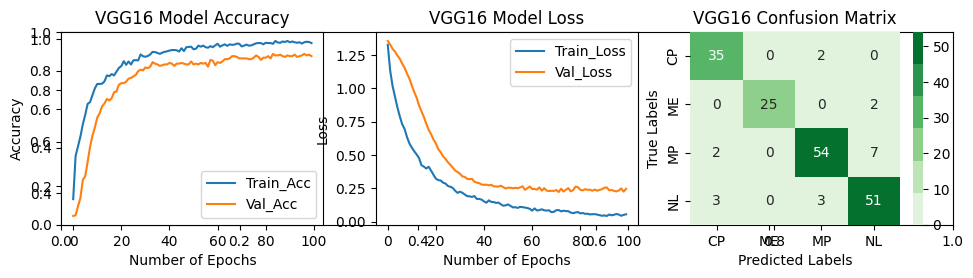

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.subplots(figsize=(11.5,2.5))
plt.subplot(1,3,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Acc', 'Val_Acc'], loc='lower right')

plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper right')

plt.subplot(1,3,3)
#plt.figure(figsize=(3.5,2.5))
colormap = sns.color_palette("Greens")
sns.heatmap(cm_df,cmap=colormap, annot=True)
plt.title('VGG16 Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       1.00      0.93      0.96        27
           2       0.92      0.86      0.89        63
           3       0.85      0.89      0.87        57

    accuracy                           0.90       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.90      0.90      0.90       184

